<a href="https://colab.research.google.com/github/GASKAP/SPARK/blob/master/synthetic_obs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Synthetic observation of the 21cm line from numerical simulation

##Install SPARK package

In [1]:
!rm -rf SPARK
!git clone https://github.com/GASKAP/SPARK
import os
os.chdir('SPARK')
!pip install .

Cloning into 'SPARK'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 155 (delta 82), reused 74 (delta 26), pack-reused 0
Receiving objects: 100% (155/155), 11.38 MiB | 6.36 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Processing /content/SPARK
  Created wheel for SPARK: filename=SPARK-0.1.0-cp36-none-any.whl size=12788 sha256=cc87b8366728a6cdba1c54ec33ac4fe5e428a8f9dd9822eabdcb113cb3ba2743
  Stored in directory: /tmp/pip-ephem-wheel-cache-n34m1h7n/wheels/39/ed/c6/1279a6dcc287cac6180c36e7b9b406799939d276a9c59984f9
Successfully built SPARK


##Import packages

In [2]:
import numpy as np
from astropy.io import fits
import astropy.table as pytabs
import matplotlib.pyplot as plt

from SPARK.synthetic import synth

##Generate synthetic observation

In [4]:
    # Open data                                                                                                                                                                                                                                                               
    path = 'data/'

    hdu_list_rho = fits.open(path + 'rho_cube_sample.fits')
    hdu_list_T = fits.open(path + 'T_cube_sample.fits')
    hdu_list_vz = fits.open(path + 'vz_cube_sample.fits')

    #Velocity range and channel spacing                                                                                                                                                                                                                                       
    vmin = -40 #km.s-1                                                                                                                                                                                                                                                        
    vmax = 40 #km.s-1                                                                                                                                                                                                                                                         
    dv = 0.8 #km.s-1                                                                                                                                                                                                                                                        

    rho_cube = hdu_list_rho[0].data #g.cm-3                                                                                                                                                                                                                                   
    T_cube = hdu_list_T[0].data #K                                                                                                                                                                                                                                            
    vz_cube = hdu_list_vz[0].data #cm.s-1                                                                                                                                                                                                                                      

    core = synth(rho=rho_cube, T=T_cube, vz=vz_cube, dz=40/1024)
    cube, tau = core.gen(vmin=vmin, vmax=vmax, dv=dv, thin=False)
    cube_thin, tau_thin = core.gen(vmin=vmin, vmax=vmax, dv=dv, thin=True)


100%|██████████| 101/101 [00:04<00:00, 24.14it/s]


##Select a range of kinetic temperature Tk - WNM

In [5]:
cube_WNM, tau_WNM = core.gen(vmin=vmin, vmax=vmax, dv=dv, T_lim=[5000,np.inf], thin=True)
cube_LNM, tau_LNM = core.gen(vmin=vmin, vmax=vmax, dv=dv, T_lim=[500,5000], thin=True)
cube_CNM, tau_CNM = core.gen(vmin=vmin, vmax=vmax, dv=dv, T_lim=[0,500], thin=True)

/content/SPARK/SPARK/synthetic/synthetic.py:68: RuntimeWarning: invalid value encountered in true_divide
  n_Delta = n / Delta
  0%|          | 0/101 [00:00<?, ?it/s]/content/SPARK/SPARK/synthetic/synthetic.py:83: RuntimeWarning: divide by zero encountered in true_divide
  phi = 1. / np.sqrt(2.*np.pi) / Delta * np.exp(- (u[i] - (vz_cube_phase))**2 / (2.*Delta2))
/content/SPARK/SPARK/synthetic/synthetic.py:83: RuntimeWarning: invalid value encountered in multiply
  phi = 1. / np.sqrt(2.*np.pi) / Delta * np.exp(- (u[i] - (vz_cube_phase))**2 / (2.*Delta2))
100%|██████████| 101/101 [00:06<00:00, 16.77it/s]


##Plot synthetic obs
### Column density map

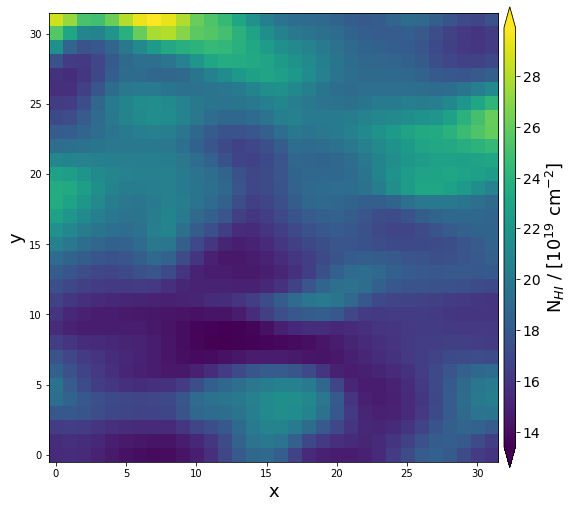

In [6]:
NHI = np.sum(cube,0) * dv * core.C.value / 1.e19

#Plot integrated column density field TOT                                                                                                                                                                                                                                     
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1,0.1,0.78,0.8])
ax.set_xlabel(r"x", fontsize=18.)
ax.set_ylabel(r"y", fontsize=18.)
img = ax.imshow(NHI, origin="lower")
colorbar_ax = fig.add_axes([0.89, 0.1, 0.02, 0.8])
cbar = fig.colorbar(img, cax=colorbar_ax, extend='both')
cbar.ax.tick_params(labelsize=14.)
cbar.set_label(r"N$_{HI}$ / [10$^{19}$ cm$^{-2}$]", fontsize=18.)
# plt.savefig("plot/" + 'NHI.png', format='png', bbox_inches='tight', 
#             pad_inches=0.02)




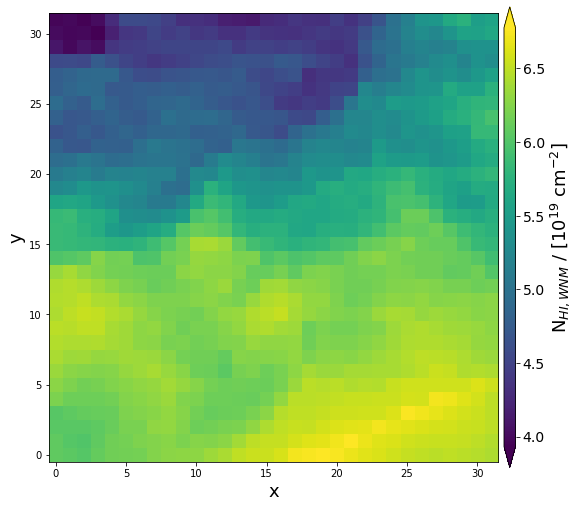

In [7]:
NHI_WNM = np.sum(cube_WNM,0) * dv * core.C.value / 1.e19

#Plot integrated column density field TOT                                                                                                                                                                                                                                     
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1,0.1,0.78,0.8])
ax.set_xlabel(r"x", fontsize=18.)
ax.set_ylabel(r"y", fontsize=18.)
img = ax.imshow(NHI_WNM, origin="lower")
colorbar_ax = fig.add_axes([0.89, 0.1, 0.02, 0.8])
cbar = fig.colorbar(img, cax=colorbar_ax, extend='both')
cbar.ax.tick_params(labelsize=14.)
cbar.set_label(r"N$_{HI,WNM}$ / [10$^{19}$ cm$^{-2}$]", fontsize=18.)
# plt.savefig("plot/" + 'NHI.png', format='png', bbox_inches='tight', 
#             pad_inches=0.02)

###Mosaic spectra

[None, None, None, None, None, None, None, None, None, None]

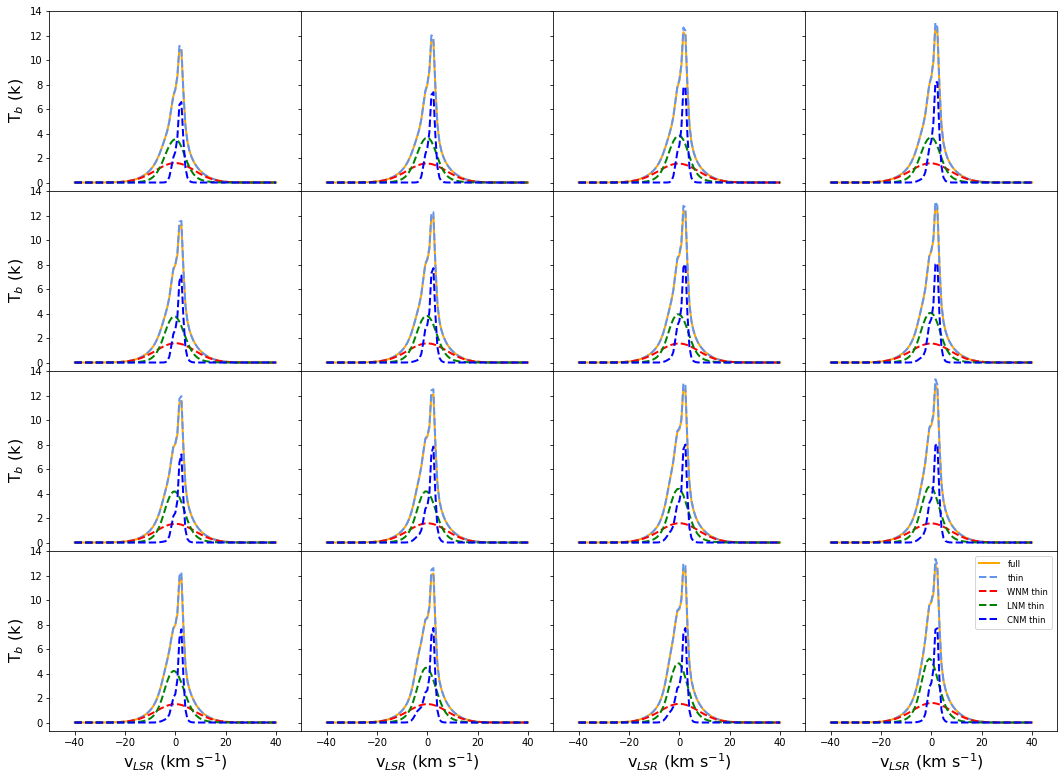

In [8]:
#Velocity array
v = np.arange(vmin,vmax+dv, dv)

#Plot mosaic spectra                                                                                                                                                                                                                                                          
def norm(pval):
    return (pval - pmin) / float(pmax - pmin)

ny = 4; nx = 4
center_y = 16; center_x = 16
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(14.,10.))
fig.subplots_adjust(hspace=0, wspace=0, left=0, right=1, top=1, bottom=0)
for i in np.arange(ny):
    for j in np.arange(nx):
        axs[i][j].set_xlim([-50,50])
        axs[i][j].plot(v, cube[:,center_y+i,center_x+j], color='orange', 
                       linewidth=2., label="full")
        axs[i][j].plot(v, cube_thin[:,center_y+i,center_x+j], "--", 
                       color='cornflowerblue', linewidth=2., label="thin")
        axs[i][j].plot(v, cube_WNM[:,center_y+i,center_x+j], "--", 
                       color='r', linewidth=2., label="WNM thin")
        axs[i][j].plot(v, cube_LNM[:,center_y+i,center_x+j], "--", 
                       color='g', linewidth=2., label="LNM thin")
        axs[i][j].plot(v, cube_CNM[:,center_y+i,center_x+j], "--", 
                       color='b', linewidth=2., label="CNM thin")
        if j == 0: axs[i][j].set_ylabel(r'T$_b$ (k)', fontsize=16)
        axs[i][j].set_xlabel(r'v$_{LSR}$ (km s$^{-1}$)', fontsize=16)
plt.legend(loc = 1, numpoints = 1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize = 'small')
# plt.savefig("plot/" + 'mosaic_spectra.png', format='png', bbox_inches='tight', 
#             pad_inches=0.02)


[None, None, None, None, None, None, None, None, None, None]

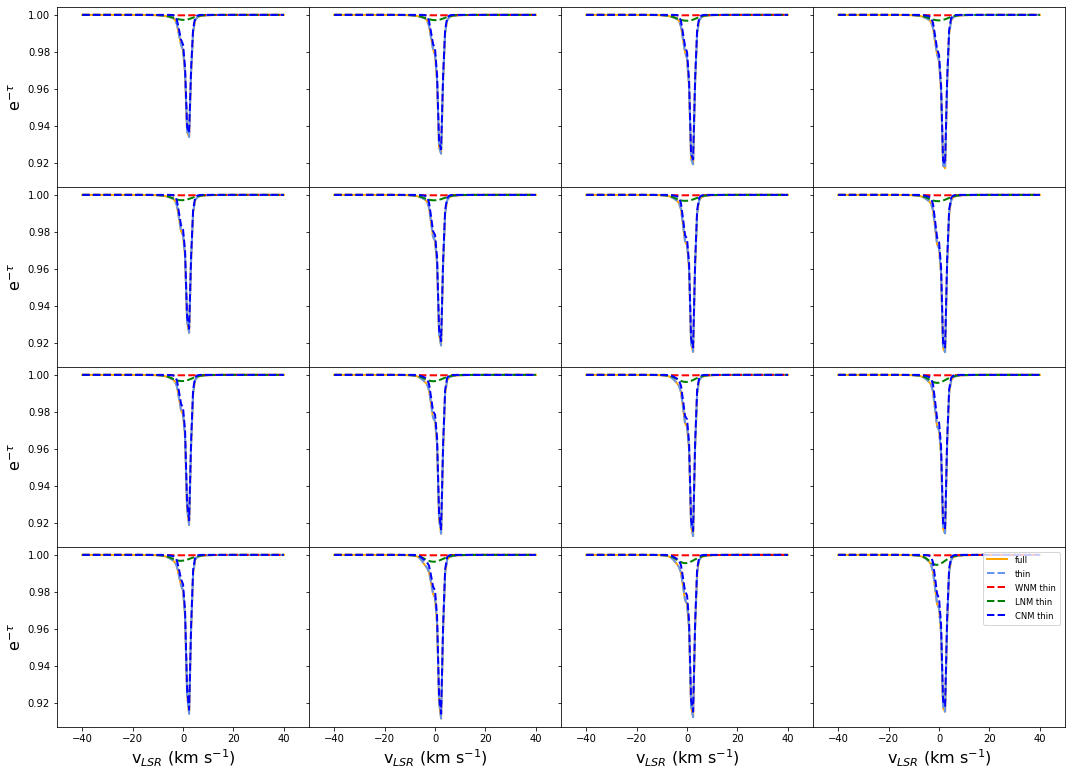

In [9]:
#Plot mosaic spectra tau                                                                                                                                                                                                                                                          
def norm(pval):
    return (pval - pmin) / float(pmax - pmin)

ny = 4; nx = 4
center_y = 16; center_x = 16
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(14.,10.))
fig.subplots_adjust(hspace=0, wspace=0, left=0, right=1, top=1, bottom=0)
for i in np.arange(ny):
    for j in np.arange(nx):
        axs[i][j].set_xlim([-50,50])
        axs[i][j].plot(v, np.exp(-tau[:,center_y+i,center_x+j]), color='orange', 
                       linewidth=2., label="full")
        axs[i][j].plot(v, np.exp(-tau_thin[:,center_y+i,center_x+j]), "--", 
                       color='cornflowerblue', linewidth=2., label="thin")
        axs[i][j].plot(v, np.exp(-tau_WNM[:,center_y+i,center_x+j]), "--", 
                       color='r', linewidth=2., label="WNM thin")
        axs[i][j].plot(v, np.exp(-tau_LNM[:,center_y+i,center_x+j]), "--", 
                       color='g', linewidth=2., label="LNM thin")
        axs[i][j].plot(v, np.exp(-tau_CNM[:,center_y+i,center_x+j]), "--", 
                       color='b', linewidth=2., label="CNM thin")
        if j == 0: axs[i][j].set_ylabel(r'e$^{- \tau}$', fontsize=16)
        axs[i][j].set_xlabel(r'v$_{LSR}$ (km s$^{-1}$)', fontsize=16)
plt.legend(loc = 1, numpoints = 1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize = 'small')
# plt.savefig("plot/" + 'mosaic_spectra.png', format='png', bbox_inches='tight', 
#             pad_inches=0.02)
